In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
foldername='Results'
if not os.path.exists(foldername):
    os.makedirs(foldername)
    

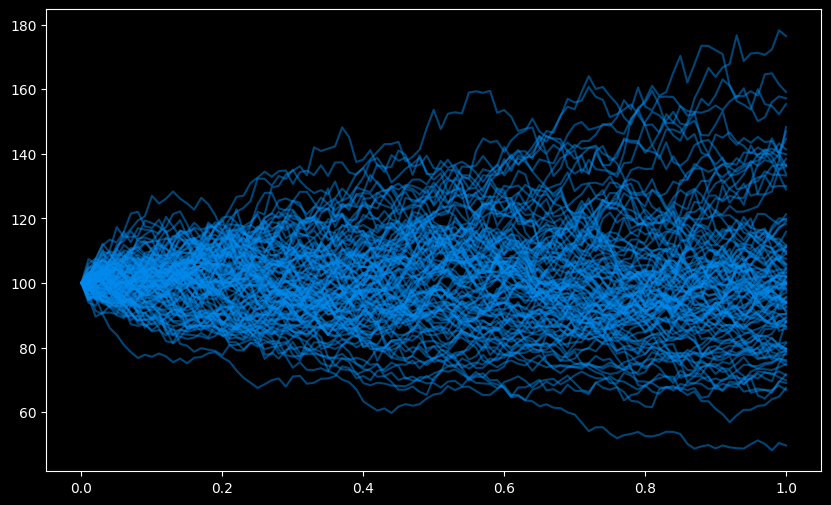

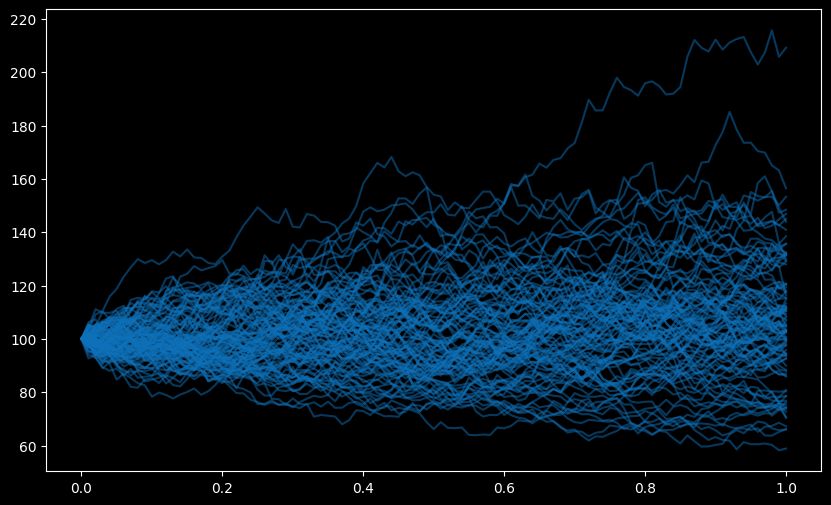

In [ ]:
Data= pd.DataFrame()

# Defining the model paramters 
s0=100
k=85
noofpaths=10000
noftimesteps=1000
matrurity=1
r=0.05
sigma=0.25

def monte_carlo_pricing(type,s0,k,r,sigma,maturity,noofpaths,noftimesteps):
    results={}
    type=type.lower()
    dt=maturity/noftimesteps
    paths=np.zeros((noofpaths,noftimesteps+1))
    paths_bar=np.zeros((noofpaths,noftimesteps+1))
    time=np.zeros(noftimesteps+1)
    time[0]=0
    for i in range(1,noftimesteps+1):
        time[i]=time[i-1]+dt
    paths[:,0]=s0
    paths_bar[:,0]=s0
    z=np.random.normal(0,1,size=(noofpaths,noftimesteps))
    z_bar = - z
    for i in range(0,noftimesteps):
        z[:,i]=(z[:,i]-np.mean(z[:,i]))/np.std(z[:,i],ddof=1)
        z_bar[:,i]=(z_bar[:,i]-np.mean(z_bar[:,i]))/np.std(z_bar[:,i],ddof=1)
        paths[:,i+1]= paths[:,i] + paths[:,i]*r*dt + paths[:,i]*sigma*z[:,i]*np.power(dt,0.5)
        paths_bar[:,i+1]=paths_bar[:,i] + paths_bar[:,i]*r*dt + paths_bar[:,i]*sigma*z_bar[:,i]*np.power(dt,0.5)
        time[i+1]=time[i]+dt
    st=paths[:,-1]
    st_bar=paths_bar[:,-1]
    results['time']=time
    results['paths']=paths
    results['paths_anithetic']=paths_bar
    results['terminal_stock']=paths[:,-1]
    results['terminal_stock_anithetic']=paths_bar[:,-1]
    if type == 'call':
        price = np.exp(-r*maturity)*np.mean(np.maximum(st-k,0))
        price_bar = np.exp(-r*maturity)*np.mean(np.maximum(st_bar-k,0))
        results['price']=price
        results['price_bar']=price_bar
        results['anithetic'] = (price+price_bar)/2
        return results
    elif type == 'put':
        price = np.exp(-r*maturity)*np.mean(np.maximum(k-st,0))
        price_bar = np.exp(-r*maturity)*np.mean(np.maximum(k-st,0))
        results['price']=price
        results['price_bar']=price_bar
        results['anithetic'] = (price+price_bar)/2
Results=monte_carlo_pricing('call',100,80,0.05,0.25,1,1000,100)

plt.style.use('dark_background')
plt.figure(figsize=(10,6))
for i in range(100):
    plt.plot(Results['time'],Results['paths'][i,:],color="#008aed",alpha=0.5,label='Stock_paths')
plt.show()

plt.style.use('dark_background')
plt.figure(figsize=(10,6))
for i in range(100):
    plt.plot(Results['time'],Results['paths_anithetic'][i,:],color="#0e71b9",alpha=0.5,label='Stock_paths_anithetic')
plt.show()

